<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 8

Partners: Brian Janger, Matthew Wang, Caleb Watson

### Problem 0 (3 points)

## Part 1: Kernels 

### Problem 1.1 (Exam Style)

First step, we put the conditions in matrix form: 

$
\begin{bmatrix}
K(x_1,x_1) & K(x_1,x_2)\\
K(x_2,x_1) & K(x_2,x_2)
\end{bmatrix}
=
\begin{bmatrix}
1 & 2\\
2 & 1
\end{bmatrix}
$

To check that it is a valid Kernel, we test if the matrix is positive semi-definite. We find the eigenvalues of the symmetrical matrix. 

The eigenvalues of the matrix are $\lambda_1=-1, \lambda_2=3$. Since one of the eigenvalues is negative, the matrix is not positive semi-definite. Therefore, no function $\rho(x)$ exists.

### Problem 1.2 (Exam Style)

The function $K(x,\xi)=(x^T\xi+c)^2$ in $R^3$ is $K(x,\xi)=(x^T\xi+c)^2=(x_1\xi_1 + x_2\xi_2 + x_3\xi_3 + c)^2$

Expanding the function out, we get 

$x_1^2\xi_1^2 + x_2^2\xi_2^2 + x_3^2\xi_3^2 + 2x_1x_2\xi_1\xi_2 + 2x_1x_3\xi_1\xi_3 + 2x_2x_3\xi_2\xi_3 + 2x_1\xi_1c + 2x_2\xi_2c + 2x_3\xi_3c + c^2$

Therefore 

$\rho(x)=\rho(x_1,x_2,x_3)=(c,x_1,x_2,x_3,\sqrt{2}x_1x_2,\sqrt{2}x_1x_3,\sqrt{2}x_2x_3,\sqrt{2}x_1,\sqrt{2}x_2,\sqrt{2}x_3)^T$

There are 10 monomials, so $e=10$

### Problem 1.3 (Exam Style)

$e={d+k \choose k}$ 

From the Chapter 1 data fitting notes, we know that the number of possible monomials of degree $k$ in $d$ variables is $m(d,k)={d+k \choose k}$. It is analogous to this problem, where we also have degree $k$ and dimension $d$ ($d$ variables)


### Problem 1.4

In [1]:
import numpy as np
import itertools

n, d = 20, 30
x = np.random.randn(n, d)

def K(x, xi, sigma): 
    return np.exp(-(np.linalg.norm(x-xi)**2)/(sigma**2))

def check_rbf_kernel(x, sigma=1.):
    ## get all unique pairs of vectors (x, xi) from the matrix
    unique_x_pairs = list(itertools.combinations(x, 2))
    
    for x_pair in unique_x_pairs: 
        cur_x = x_pair[0]
        cur_xi = x_pair[1]
        
        #Test for conditions that a kernel must satisify 
        if (K(cur_x, cur_xi, sigma) != K(cur_xi, cur_x, sigma)):
            return 'not ok'
        if (K(cur_x, cur_xi, sigma)**2 > K(cur_x, cur_x, sigma) * K(cur_xi, cur_xi, sigma)):
            return 'not ok'
        if (K(cur_xi, cur_x, sigma)**2 > K(cur_x, cur_x, sigma) * K(cur_xi, cur_xi, sigma)): 
            return 'not ok'
    return 'ok'  
    
check_rbf_kernel(x)

'ok'

## Part 2: The Representer Theorem 

In [2]:
from urllib.request import urlretrieve
from os import path as osp

def retrieve(file_name, semester='fall22', course='371', homework=8):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [3]:
import pickle
ad_data_file = 'ad.pickle'
retrieve(ad_data_file, homework=6)
with open(ad_data_file, 'rb') as file:
    ad_data = pickle.load(file)

Using previously downloaded file ad.pickle


### Problem 2.1 (Exam Style)

The representer theorem does hold for $L_{\text{reg}}(v) = \left\lVert v \right\rVert^2 + CL_T(v)$ because it matches the general formulation of the representer theorem (assuming $v$ is a training observation where $v \in \mathbb{R}^N$). The representer theorem requires a strictly increasing function $R$ from $\mathbb{R}_+$ to $\mathbb{R}$ and any function $S$ from $\mathbb{R}^N$ to $\mathbb{R}$.

We see that for the function $R(a) = a^2$ and the function $S(v) = CL_T(v)$, the LRC risk function can be rewritten as $L_{\text{reg}}(v) = R(\left\lVert v \right\rVert) + S(v)$, which matches the general formulation of the representer theorem. Therefore, the reprenter theorem holds for LRCs trained with regularization.

### Problem 2.2 (Exam Style)

The representer theorem does not hold for $L_T(v) = -\frac{1}{N}\sum\limits_{n=1}^N[y_n\log p_n + (1-y_n)\log(1-p_n)]$ where $p_n = \frac{1}{e^{-w^Tx_n-b}}$ because we violate the proof assumption that we have a strictly increasing function $R$ from $\mathbb{R}_+$ to $\mathbb{R}$ in our training risk function. All we have in the standard cross-entropy loss function is a single term, which serves as the function $S$ from $\mathbb{R}^N$ to $R$.

The proof is violated specifically at inequality (6) in the class notes, where we use the function $R$ to justify the implication that $R(\left\lVert w \right\rVert) < R(\left\lVert w* \right\rVert)$ (where $w = w^* - u, u \neq 0$). 

Since the proof also shows that our function $S$ has the property $S(w^Tx_1+b,...,w^Tx_N+b) = S((w^*)^Tx_1+b,...,(w^*)^Tx_N+b)$, the proof relies on the fact that inequality (6) exists to prove that $L(w,b) < L(w^*,b)$. Since this statement isn't valid anymore, we can't say that $w^*$ is the optimal vector, and therefore the vector $u \in X^\perp$ can be nonzero, meaning the hyerplane cannot be expressed as a linear combination of the input vectors $x_1,...,x_N \in X$.

### Problem 2.3

In [4]:
def evaluate(h, data, h_name):
    def accuracy(s):
        sx, sy = s['x'], s['y']
        return h.score(sx, sy) * 100

    train, test = data['train'], data['test']
    f = '{:s}:\n\ttraining accuracy is {:.2f} percent,' +\
        '\n\ttest accuracy is {:.2f} percent,'
    print(f.format(h_name, accuracy(train), accuracy(test)))

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def experiment(h, data, h_name): 
    # cross-validates classifier and fits to determine a regularization constant
    cs = np.logspace(-3,2,15)
    h = GridSearchCV(h, {'C': cs})
    h = h.fit(data['train']['x'], data['train']['y'])
    h = h.best_estimator_
    
    # obtain training and testing accuracy
    evaluate(h, data, h_name)

    #printing remaining required information
    print('\tthe best value for the regularization constant C is {},'.format(h.C))
    print('\tthere are {} training samples of dimensionality {},'.format(len(data['train']['x']), len(data['train']['x'][0])))
    print('\tthe number of linearly independent training samples is {}'.format(np.linalg.matrix_rank(data['train']['x'])))
    
    # calculating residuals for optimal and random vectors (only applicable to linear classifiers)
    if hasattr(h, 'coef_'):
        w = h.coef_.flatten()
        random_w = np.random.rand(len(w))
        
        print('\tthe residual for the optimal vector found by the training algorithm is {}.'.format(residual(w, data['train']['x'])))
        print('\tthe residual for a random vector is {}.'.format(residual(random_w, data['train']['x'])))
        return h, w
    else:
        return h
    
# helper function to calculate residual
def residual(vector, data):
    # computing coefficients from the data points
    beta = np.linalg.lstsq(data.T, vector, rcond=None)[0]
        
    return np.linalg.norm(vector - np.dot(data.T,beta))
    
experiment(LogisticRegression(max_iter=1000), ad_data, 'LRC');

LRC:
	training accuracy is 99.15 percent,
	test accuracy is 96.78 percent,
	the best value for the regularization constant C is 0.0610540229658533,
	there are 1179 training samples of dimensionality 1430,
	the number of linearly independent training samples is 561
	the residual for the optimal vector found by the training algorithm is 8.430698288788036e-15.
	the residual for a random vector is 8.686596249726659.


In order to determine if the representer theorem holds, the residual should be calculated by determining a least-squares solution of coefficients $\beta_0,...,\beta_N$ from the training data points for the optimal vector found by the training algorithm. Given that the residual is essentially zero ( in the case of the optimal vector, we may say that the representer theorem holds here for classifier $h$. 

The dimensionality of the data set is extremely high - in this case, we see that there is dimensionality 1430. Because of the fact that a random vector $w$ must randomize 1430 vector parameters, it is extremely unlikely that we pick a vector with a near zero residual. Furthermore, since there are only 1179 training samples, it makes it even less likely that our randomized vector will be a linear combination of the 1179 samples when $d=1430$, as the data points themselves do not form a representative basis for $\mathbb{R}^{1430}$.

### Problem 2.4

In [6]:
from sklearn.svm import SVC

svm, w_svm = experiment(SVC(kernel='linear'), ad_data, 'SVM')
random_w = np.random.rand(len(w_svm))

support_vectors = svm.support_vectors_

f = '\n\tThe total number of support vectors is {} and {} are linearly independent.'
print(f.format(np.shape(support_vectors)[0], np.linalg.matrix_rank(svm.support_vectors_)))

f = '\n\tThe residual obtained when just using support vectors is {}.'
print(f.format(residual(w_svm, support_vectors)))

f = '\n\tThe residual obtained for a random vector when just using support vectors is {}.'
print(f.format(residual(random_w, support_vectors)))                                                                

SVM:
	training accuracy is 99.15 percent,
	test accuracy is 96.36 percent,
	the best value for the regularization constant C is 0.02682695795279726,
	there are 1179 training samples of dimensionality 1430,
	the number of linearly independent training samples is 561
	the residual for the optimal vector found by the training algorithm is 6.3763029441806245e-15.
	the residual for a random vector is 8.77694927381593.

	The total number of support vectors is 199 and 185 are linearly independent.

	The residual obtained when just using support vectors is 4.846464288269507e-15.

	The residual obtained for a random vector when just using support vectors is 11.473845672594427.


 - The test accuracies for both the training and testing data are similar for both a support vector and logisitic regression classifier (same training accuracy and negligible differences in testing accuracy). This is because both models are esentially interchangeable as shown in the last assignment in the case of binary linear classification. 
 - No, the classifiers do not overfit. We see that while we do attain a very high training accuracy for both classifiers, we are still very accurate (>95% for both classifiers) on the test set in both classifiers, so we do not lose an extreme amount of test set accuracy by performing well on the training set. The accuracy decrease from the training set to the test set can be attributed to irreducible error.
 - The minimum number of data points needed to represent $w^*$ through the representer theorem for the LRC is 561, the number of linearly independent training samples.
 - The minimum number of data points needed to represent $w^*$ through the representer theorem for the SVM is 185, the number of linearly independent support vectors.

## Part 3: Linear and Nonlinear SVMs 

In [7]:
data_2d_file_name = 'data.pickle'
retrieve(data_2d_file_name)
with open(data_2d_file_name, 'rb') as file:
    data_2d = pickle.load(file)

Using previously downloaded file data.pickle


In [8]:
show_file = 'show.py'
retrieve(show_file)
from show import show_classification

Using previously downloaded file show.py


### Problem 3.1 (Exam Style except for Running the Code)

In [9]:
experiment(SVC(kernel='rbf'), ad_data, 'RBF SVM')

RBF SVM:
	training accuracy is 99.15 percent,
	test accuracy is 96.02 percent,
	the best value for the regularization constant C is 19.306977288832496,
	there are 1179 training samples of dimensionality 1430,
	the number of linearly independent training samples is 561


SVC(C=19.306977288832496)

 - The difference in test accuracy between the RBF SVM and the linear SVM is negligible, as the difference is smaller than one percent. They perform equally as well on the test set.
 - The RBF SVM and linear SVM likely perform similarly well on the test set because the best-separating boundary (without overfitting) is likely to be very close to linear. We see that the RBF SVM's cross-validated regularization constant C is much higher than the linear SVM's regularization constant, meaning that the penalty for misclassification in the RBF SVM is much higher than the linear SVM - this causes the margin to be much smaller in the former when compared to the latter. We see that the training accuracies of the two SVMs are actually identical, so they likely found similar-looking decision boundaries on the training data. We notice that the test accuracy of the RBF SVM is slightly (but negligibly) smaller than the test accuracy of the linear SVM, indicating that the RBF SVM's transformation of a supposed nonlinear space into a linear space doesn't give us much improvement. This indicates that the boundary found by the linear SVM is very close to optimal, and can't be improved on very much by the RBF SVM, hence why they perform similarly after cross-validating the regularization parameter.

### Problem 3.2 (Exam Style except for Running the Code)

linear SVM:
	training accuracy is 70.30 percent,
	test accuracy is 72.90 percent,
	the best value for the regularization constant C is 0.7196856730011522,
	there are 1000 training samples of dimensionality 2,
	the number of linearly independent training samples is 2
	the residual for the optimal vector found by the training algorithm is 9.485749680535094e-16.
	the residual for a random vector is 3.925231146709438e-17.
	684 support vectors found


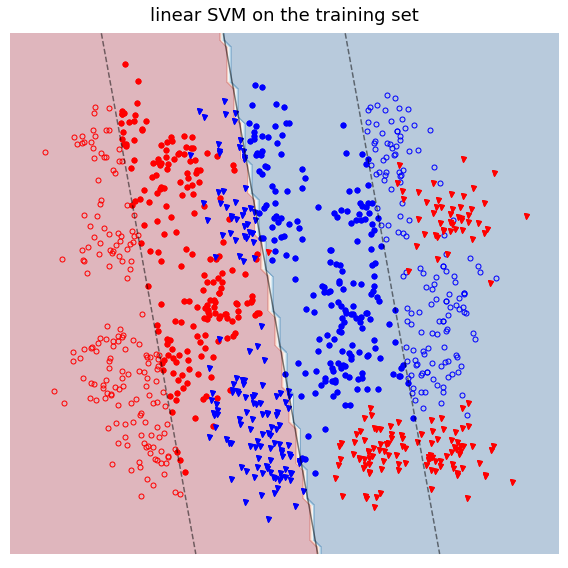

In [10]:
linear_svm, _ = experiment(SVC(kernel='linear'), data_2d, 'linear SVM')
show_classification(linear_svm, data_2d['train'], 'training', 'linear SVM')

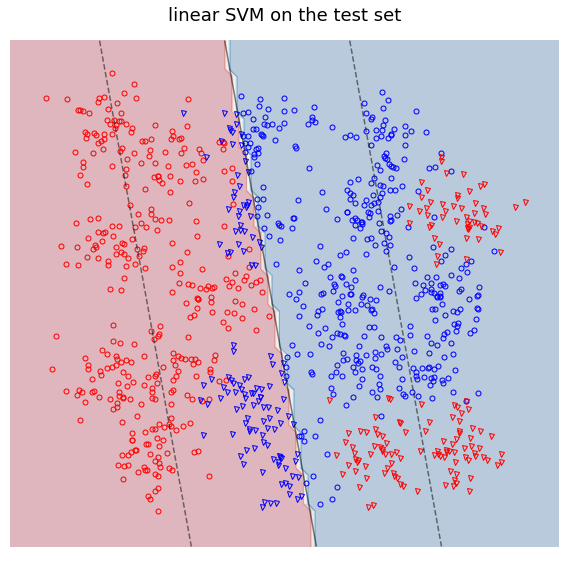

In [11]:
show_classification(linear_svm, data_2d['test'], 'test', 'linear SVM')

 - The data is not separable. If the data were separable, then the training accuracy of the linear SVM would be 100%, but we can see that this is far from the case (actual training accuracy is about 70%).
 - While the classifier does not achieve a very high training nor testing accuracy, it still generalizes well as the testing accuracy is very similar to the training accuracy. This means that the classifier, while not extremely accurate, is still quite receptive to unseen data and can generalize the data to a certain degree.
 - The number of support vectors is not small relative to the size of the training set - we see that there are 684 support vectors and 1000 total samples.
 - The reference margin width is very large relative to the support of the training data distribution - we see that a majority of the points in the training set lie within the margins, and it generally appears "wide".
 - Yes, the past two questions are related to each other. Support vectors are defined as the data points that are either incorrectly classified or classified correctly with a margin of less than the reference margin. Therefore, if the number of support vectors is large compared to the number of total training points, we would expect the reference margin to be wider. We see that about 30% of the points are misclassified on the training set by this classifier, but 68.4% of the training observations are used as support vectors. This leaves a large subset of observations that must lie within the margins (keep in mind some of the misclassified points can lie within the margins too). Therefore, the width of the reference margin and the number of support vectors are definitely related.
 - The representer theorem representation holds for random vectors in this problem because of the small dimensionality of the training set. We see that we have $d=2$ and 1000 training observations. Therefore, any random vector we create can almost certainly be expressed as a linear combination of the training observations (unless the observations are all linearly dependent, which is extremely unlikely - we only need two of them to be linearly independent to get a basis for the $\mathbb{R}^2$ space!).

### Problem 3.3 (Exam Style except for Running the Code)

RBF SVM:
	training accuracy is 95.90 percent,
	test accuracy is 94.80 percent,
	the best value for the regularization constant C is 43.93970560760795,
	there are 1000 training samples of dimensionality 2,
	the number of linearly independent training samples is 2
	134 support vectors found


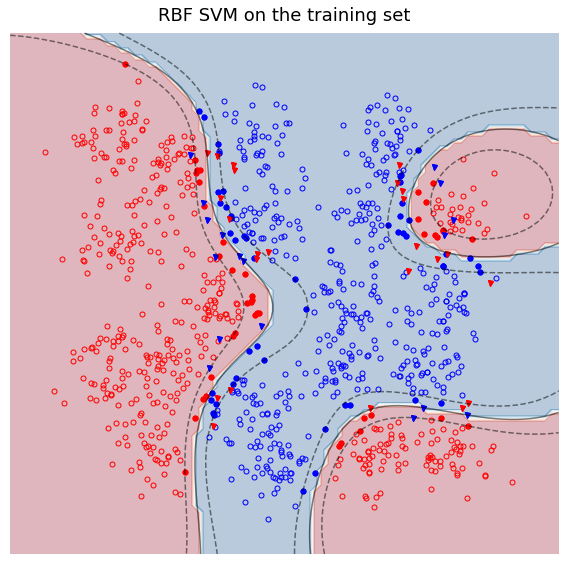

In [12]:
rbf_svm = experiment(SVC(kernel='rbf'), data_2d, 'RBF SVM')
show_classification(rbf_svm, data_2d['train'], 'training', 'RBF SVM')

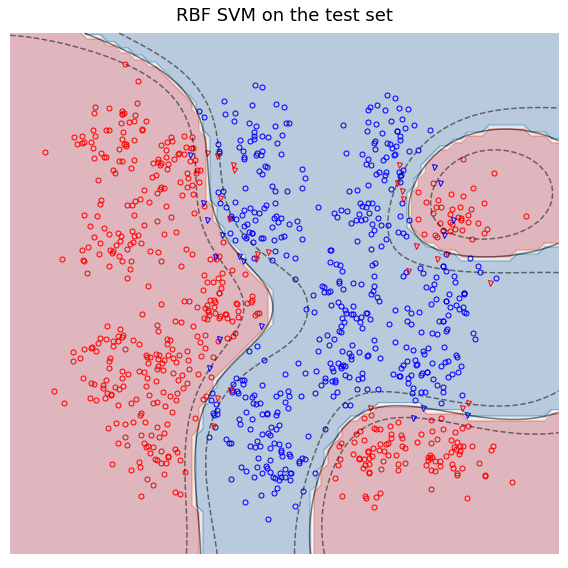

In [13]:
show_classification(rbf_svm, data_2d['train'], 'test', 'RBF SVM')

- The RBF SVM does perform better than the linear SVM, with an increased test accuracy of approximately 20 percent. Because of the usage of Gaussian kernels, nonlinear decision boundaries can be inferred for the classifier unlike in the linear SVM approach. We can observe a "grouping" effect, almost like a more sophisticated KNN approach.
- The classifier does generalize well as the testing accuracy is very similar to the training accuracy, with both being relatively high. This means that the classifier is receptive to unseen data and can generalize the data to a certain degree (while maintaining much better performance).
- In comparison to the linear SVM (684 support vectors), the RBF SVM has a smaller number of support vectors (134).
- Additionally, the reference margin for the RBF SVM is narrower than that of the linear SVM.
- Yes! As previously described in problem 3.2, we would expect the reference margin to be wider as the number of support vectors increases. Here, we are seeing the contrary, in which the reference margin narrows as the number of support vectors decreased from 684 for the linear SVM model to 134 for RBF SVM. A geometric explanation would be that smaller reference margins give us less of an area where support vectors can be (outside of misclassified points, which there are also less of in the RBF SVM). Therefore, a smaller reference margin likely indicates less support vectors (the opposite of what we found in 3.2).